In [2]:
# Required Libraries, more to come as the project is still unfolding

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import sklearn
import pandas as pd
import math
import random
import seaborn as sns
import os
import glob


from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier

Merging the files from all the participants folder as a sample data to begin with.

In [2]:
# Set path to the folder containing the selected Participants CSV files
folder_path = "data_files/"

# Created empty list to hold the dataframes
df_list = []

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        # Read the CSV file into a dataframe
        df = pd.read_csv(file_path)
        # Append the dataframe to the list
        df_list.append(df)

# Concatenate the dataframes into a single dataframe
merged_df = pd.concat(df_list, ignore_index=True)

# Write the merged dataframe to a named CSV file
merged_df.to_csv("data_files/merged_file.csv", index=False)

/Users/cloud/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Reading the data

In [3]:
# Creating the dataframe
data = pd.read_csv('data_files/merged_file.csv')

/Users/cloud/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data

Unnamed: 0  Recording timestamp  Computer timestamp       Sensor  \
0            19784              7780190        515509715174          NaN   
1            19785              7780190        515509715174          NaN   
2            19786              7786595        515509721579  Eye Tracker   
3            19787              7794992        515509729976  Eye Tracker   
4            19788              7803251        515509738235  Eye Tracker   
...            ...                  ...                 ...          ...   
671503       55558            150140209          3434416445  Eye Tracker   
671504       55559            150148543          3434424779  Eye Tracker   
671505       55560            150156907          3434433143  Eye Tracker   
671506       55561            150161872          3434438108          NaN   
671507       55562            150165207          3434441443  Eye Tracker   

                    Project name Export date Participant name Recording name  \
0       Control group experiment  06.10.2020  Participant0002     Recording5   
1       Control group experiment  06.10.2020  Participant0002     Recording5   
2       Control group experiment  06.10.2020  Participant0002     Recording5   
3       Control group experiment  06.10.2020  Participant0002     Recording5   
4       Control group experiment  06.10.2020  Participant0002     Recording5   
...                          ...         ...              ...            ...   
671503          Participants0039  16.03.2021  Participant0039     Recording5   
671504          Participants0039  16.03.2021  Participant0039     Recording5   
671505          Participants0039  16.03.2021  Participant0039     Recording5   
671506          Participants0039  16.03.2021  Participant0039     Recording5   
671507          Participants0039  16.03.2021  Participant0039     Recording5   

       Recording date Recording date UTC  ... Original Media height  \
0          30.09.2020         30.09.2020  ...                   NaN   
1          30.09.2020         30.09.2020  ...                   NaN   
2          30.09.2020         30.09.2020  ...                 416.0   
3          30.09.2020         30.09.2020  ...                 416.0   
4          30.09.2020         30.09.2020  ...                 416.0   
...               ...                ...  ...                   ...   
671503     16.03.2021         16.03.2021  ...                1447.0   
671504     16.03.2021         16.03.2021  ...                1447.0   
671505     16.03.2021         16.03.2021  ...                1447.0   
671506     16.03.2021         16.03.2021  ...                   NaN   
671507     16.03.2021         16.03.2021  ...                   NaN   

       Eye movement type  Gaze event duration Eye movement type index  \
0                Saccade                 92.0                    36.0   
1                Saccade                 92.0                    36.0   
2                Saccade                 92.0                    36.0   
3                Saccade                 92.0                    36.0   
4                Saccade                 92.0                    36.0   
...                  ...                  ...                     ...   
671503      Unclassified                 50.0                   675.0   
671504      Unclassified                 50.0                   675.0   
671505      Unclassified                 50.0                   675.0   
671506      Unclassified                 50.0                   675.0   
671507      Unclassified                 50.0                   675.0   

       Fixation point X Fixation point Y  Fixation point X (MCSnorm)  \
0                   NaN              NaN                         NaN   
1                   NaN              NaN                         NaN   
2                   NaN              NaN                         NaN   
3                   NaN              NaN                         NaN   
4                   NaN              NaN    

Exploring the Data

In [5]:
# Checking concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671508 entries, 0 to 671507
Data columns (total 71 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           671508 non-null  int64  
 1   Recording timestamp                  671508 non-null  int64  
 2   Computer timestamp                   671508 non-null  int64  
 3   Sensor                               670902 non-null  object 
 4   Project name                         671508 non-null  object 
 5   Export date                          671508 non-null  object 
 6   Participant name                     671508 non-null  object 
 7   Recording name                       671508 non-null  object 
 8   Recording date                       671508 non-null  object 
 9   Recording date UTC                   671508 non-null  object 
 10  Recording start time                 671508 non-null  object 
 11  Recording sta

There are severa columns have missing values.

Most columns are Objects with less of numericals (int64 or float64). 
Column 'Eye movement type' is of type 'object', which, as it comes from a csv file, typically means strings. We can see this in the output. It looks like it's a categorical feature, so we'll check how many categories there are and how many examples for each.

In [6]:
data['Eye movement type'].value_counts()

Fixation        360806
Saccade         115650
Unclassified    109038
EyesNotFound     85962
Name: Eye movement type, dtype: int64

In [7]:
data['Eye position left X (DACSmm)'].value_counts()

232,7    3499
232,8    3171
233,0    2917
232,9    2821
232,6    2748
         ... 
299,8       1
281,7       1
286,8       1
307,2       1
285,1       1
Name: Eye position left X (DACSmm), Length: 1927, dtype: int64

In [8]:
data['Project name'].value_counts()

Control group experiment    107084
Test group experiment        43814
Participant0060              25110
Participant0059              23028
Participant0031              18796
Project0057                  18091
Participants0039             17632
Participant0015              17217
Participant0035              16932
Participant0041              15372
Participant0029              15122
Participant0049              14988
Participant0017              14291
Participant0047              14120
Participant0019              13791
Participant0053              12925
Participant0021              12335
Participant0037              11684
Participant0033              11467
Participant0043              11129
Participant0024              10347
Participånt0014               9605
Participant0045               9360
Participant0044               9184
Participant0022               8828
Participant0026               8550
Participant0027               8121
Participant0036               8004
Participant0020     

Now let's do some checks of the numerical columns.

In [9]:
#Descriptive statistics on the shape of the dataset’s distribution exluding NaN
data.describe()

Unnamed: 0  Recording timestamp  Computer timestamp  \
count  671508.000000         6.715080e+05        6.715080e+05   
mean    33313.357738         6.435188e+07        9.364061e+11   
std     26716.901280         4.778723e+07        1.023629e+12   
min       347.000000         2.505043e+06        5.120924e+08   
25%     15306.000000         2.899757e+07        7.201106e+09   
50%     25800.000000         5.219036e+07        5.156897e+11   
75%     43291.000000         8.697942e+07        1.400198e+12   
max    138286.000000         2.282859e+08        4.234104e+12   

       Recording duration  Recording resolution height  \
count       671508.000000                     671508.0   
mean        122635.111046                       1080.0   
std          58252.792603                          0.0   
min          52534.000000                       1080.0   
25%          67066.000000                       1080.0   
50%         110986.000000                       1080.0   
75%         151866.000000                       1080.0   
max         228445.000000                       1080.0   

       Recording resolution width  Eyetracker timestamp   Gaze point X  \
count                    671508.0          6.639810e+05  576741.000000   
mean                       1920.0          4.665818e+09     881.035089   
std                           0.0          1.427670e+10     293.744963   
min                        1920.0          1.945353e+08    -351.000000   
25%                        1920.0          1.011806e+09     716.000000   
50%                        1920.0          1.550709e+09     896.000000   
75%                        1920.0          2.998082e+09    1030.000000   
max                        1920.0          8.065449e+10    2298.000000   

        Gaze point Y  Gaze point left X  ...  \
count  576741.000000      525212.000000  ...   
mean      426.009732         818.098653  ...   
std       278.910885         300.584775  ...   
min      -216.000000        -351.000000  ...   
25%       232.000000         645.000000  ...   
50%       423.000000         828.000000  ...   
75%       633.000000         978.000000  ...   
max      2317.000000        2298.000000  ...   

       Presented Media position X (DACSpx)  \
count                        670808.000000   
mean                            146.011182   
std                             177.141025   
min                            -747.000000   
25%                             129.000000   
50%                             214.000000   
75%                             214.000000   
max                             337.000000   

       Presented Media position Y (DACSpx)  Original Media width  \
count                        670808.000000         670808.000000   
mean                            -36.961849           1489.290049   
std                             204.463502            718.196002   
min                           -1168.000000            640.000000   
25%                               0.000000            640.000000   
50%                               0.000000           1920.000000   
75%                               0.000000           2000.000000   
max                               0.000000           3415.000000   

       Original Media height  Gaze event duration  Eye movement type index  \
count          670808.000000        671456.000000            671456.000000   
mean             1072.279533           260.567513               433.488927   
std               621.160465           439.299403               638.462697   
min               416.000000             8.000000                 1.000000   
25%               416.000000            33.000000                99.000000   
50%              1080.000000           125.000000               204.000000   
75%              1447.000000           308.000000               457.000000   
max              3415.000000          4893.000000              4576.000000   

       Fixation point X  Fixation point Y  Mouse position X  Mouse pos

In [10]:
# Checking for NaN values
data.isna()

Unnamed: 0  Recording timestamp  Computer timestamp  Sensor  \
0            False                False               False    True   
1            False                False               False    True   
2            False                False               False   False   
3            False                False               False   False   
4            False                False               False   False   
...            ...                  ...                 ...     ...   
671503       False                False               False   False   
671504       False                False               False   False   
671505       False                False               False   False   
671506       False                False               False    True   
671507       False                False               False   False   

        Project name  Export date  Participant name  Recording name  \
0              False        False             False           False   
1              False        False             False           False   
2              False        False             False           False   
3              False        False             False           False   
4              False        False             False           False   
...              ...          ...               ...             ...   
671503         False        False             False           False   
671504         False        False             False           False   
671505         False        False             False           False   
671506         False        False             False           False   
671507         False        False             False           False   

        Recording date  Recording date UTC  ...  Original Media height  \
0                False               False  ...                   True   
1                False               False  ...                   True   
2                False               False  ...                  False   
3                False               False  ...                  False   
4                False               False  ...                  False   
...                ...                 ...  ...                    ...   
671503           False               False  ...                  False   
671504           False               False  ...                  False   
671505           False               False  ...                  False   
671506           False               False  ...                   True   
671507           False               False  ...                   True   

        Eye movement type  Gaze event duration  Eye movement type index  \
0                   False                False                    False   
1                   False                False                    False   
2                   False                False                    False   
3                   False                False                    False   
4                   False                False                    False   
...                   ...                  ...                      ...   
671503              False                False                    False   
671504              False                False                    False   
671505              False                False                    False   
671506              False                False                    False   
671507              False                False                    False   

        Fixation point X  Fixation point Y  Fixation point X (MCSnorm)  \
0                   True              True                        True   
1                   True              True                        True   
2                   True              True                        True   
3                   True              True                        True   
4                   True              True                        True   
...                  ...               ...                         .

In [11]:
# Checking for the sum of NaN values

data.isna().sum()

Unnamed: 0                         0
Recording timestamp                0
Computer timestamp                 0
Sensor                           606
Project name                       0
                               ...  
Fixation point Y              310702
Fixation point X (MCSnorm)    338885
Fixation point Y (MCSnorm)    338885
Mouse position X              664587
Mouse position Y              664587
Length: 71, dtype: int64

In [12]:
# Checking for sum of the null values

data.isnull().sum()

Unnamed: 0                         0
Recording timestamp                0
Computer timestamp                 0
Sensor                           606
Project name                       0
                               ...  
Fixation point Y              310702
Fixation point X (MCSnorm)    338885
Fixation point Y (MCSnorm)    338885
Mouse position X              664587
Mouse position Y              664587
Length: 71, dtype: int64

In [13]:
#checks for duplicates rows in the train dataframe
data.duplicated().sum()

0

In [14]:
# Get the list of all columns in the dataset
all_cols = data.columns.tolist()

# Get the list of columns that have missing values
missing_cols = data.columns[data.isnull().any()].tolist()

# Get the list of columns that have no missing values
non_missing_cols = list(set(all_cols) - set(missing_cols))

# Print the missing column(s)
print("Missing column(s):")
for col in all_cols:
    if col not in non_missing_cols:
        print(col)

Missing column(s):
Sensor
Eyetracker timestamp
Event
Event value
Gaze point X
Gaze point Y
Gaze point left X
Gaze point left Y
Gaze point right X
Gaze point right Y
Gaze direction left X
Gaze direction left Y
Gaze direction left Z
Gaze direction right X
Gaze direction right Y
Gaze direction right Z
Pupil diameter left
Pupil diameter right
Validity left
Validity right
Eye position left X (DACSmm)
Eye position left Y (DACSmm)
Eye position left Z (DACSmm)
Eye position right X (DACSmm)
Eye position right Y (DACSmm)
Eye position right Z (DACSmm)
Gaze point left X (DACSmm)
Gaze point left Y (DACSmm)
Gaze point right X (DACSmm)
Gaze point right Y (DACSmm)
Gaze point X (MCSnorm)
Gaze point Y (MCSnorm)
Gaze point left X (MCSnorm)
Gaze point left Y (MCSnorm)
Gaze point right X (MCSnorm)
Gaze point right Y (MCSnorm)
Presented Stimulus name
Presented Media name
Presented Media width
Presented Media height
Presented Media position X (DACSpx)
Presented Media position Y (DACSpx)
Original Media width


In [15]:
# Get the list of columns that have missing values
missing_cols = data.columns[data.isnull().any()].tolist()

# Fill missing numerical values with mean or mode
for col in missing_cols:
    if data[col].dtype == 'object':
        mode = data[col].mode()[0]
        data[col].fillna(mode, inplace=True)
        print(f"Filled missing values in column {col} with mode: {mode}")
    else:
        mean = data[col].mean()
        data[col].fillna(mean, inplace=True)
        print(f"Filled missing values in column {col} with mean: {mean}")

Filled missing values in column Sensor with mode: Eye Tracker
Filled missing values in column Eyetracker timestamp with mean: 4665817890.099076
Filled missing values in column Event with mode: KeyboardEvent
Filled missing values in column Event value with mode: [Ctrl] + LeftControl
Filled missing values in column Gaze point X with mean: 881.0350885406101
Filled missing values in column Gaze point Y with mean: 426.0097322715049
Filled missing values in column Gaze point left X with mean: 818.0986534961121
Filled missing values in column Gaze point left Y with mean: 437.3542778915943
Filled missing values in column Gaze point right X with mean: 944.0837392914324
Filled missing values in column Gaze point right Y with mean: 416.84774674285023
Filled missing values in column Gaze direction left X with mode: 0,00362
Filled missing values in column Gaze direction left Y with mode: 0,01229
Filled missing values in column Gaze direction left Z with mode: -0,99960
Filled missing values in colum

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671508 entries, 0 to 671507
Data columns (total 71 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           671508 non-null  int64  
 1   Recording timestamp                  671508 non-null  int64  
 2   Computer timestamp                   671508 non-null  int64  
 3   Sensor                               671508 non-null  object 
 4   Project name                         671508 non-null  object 
 5   Export date                          671508 non-null  object 
 6   Participant name                     671508 non-null  object 
 7   Recording name                       671508 non-null  object 
 8   Recording date                       671508 non-null  object 
 9   Recording date UTC                   671508 non-null  object 
 10  Recording start time                 671508 non-null  object 
 11  Recording sta

In [17]:
data

Unnamed: 0  Recording timestamp  Computer timestamp       Sensor  \
0            19784              7780190        515509715174  Eye Tracker   
1            19785              7780190        515509715174  Eye Tracker   
2            19786              7786595        515509721579  Eye Tracker   
3            19787              7794992        515509729976  Eye Tracker   
4            19788              7803251        515509738235  Eye Tracker   
...            ...                  ...                 ...          ...   
671503       55558            150140209          3434416445  Eye Tracker   
671504       55559            150148543          3434424779  Eye Tracker   
671505       55560            150156907          3434433143  Eye Tracker   
671506       55561            150161872          3434438108  Eye Tracker   
671507       55562            150165207          3434441443  Eye Tracker   

                    Project name Export date Participant name Recording name  \
0       Control group experiment  06.10.2020  Participant0002     Recording5   
1       Control group experiment  06.10.2020  Participant0002     Recording5   
2       Control group experiment  06.10.2020  Participant0002     Recording5   
3       Control group experiment  06.10.2020  Participant0002     Recording5   
4       Control group experiment  06.10.2020  Participant0002     Recording5   
...                          ...         ...              ...            ...   
671503          Participants0039  16.03.2021  Participant0039     Recording5   
671504          Participants0039  16.03.2021  Participant0039     Recording5   
671505          Participants0039  16.03.2021  Participant0039     Recording5   
671506          Participants0039  16.03.2021  Participant0039     Recording5   
671507          Participants0039  16.03.2021  Participant0039     Recording5   

       Recording date Recording date UTC  ... Original Media height  \
0          30.09.2020         30.09.2020  ...           1072.279533   
1          30.09.2020         30.09.2020  ...           1072.279533   
2          30.09.2020         30.09.2020  ...            416.000000   
3          30.09.2020         30.09.2020  ...            416.000000   
4          30.09.2020         30.09.2020  ...            416.000000   
...               ...                ...  ...                   ...   
671503     16.03.2021         16.03.2021  ...           1447.000000   
671504     16.03.2021         16.03.2021  ...           1447.000000   
671505     16.03.2021         16.03.2021  ...           1447.000000   
671506     16.03.2021         16.03.2021  ...           1072.279533   
671507     16.03.2021         16.03.2021  ...           1072.279533   

       Eye movement type  Gaze event duration Eye movement type index  \
0                Saccade                 92.0                    36.0   
1                Saccade                 92.0                    36.0   
2                Saccade                 92.0                    36.0   
3                Saccade                 92.0                    36.0   
4                Saccade                 92.0                    36.0   
...                  ...                  ...                     ...   
671503      Unclassified                 50.0                   675.0   
671504      Unclassified                 50.0                   675.0   
671505      Unclassified                 50.0                   675.0   
671506      Unclassified                 50.0                   675.0   
671507      Unclassified                 50.0                   675.0   

       Fixation point X Fixation point Y  Fixation point X (MCSnorm)  \
0            888.039631       425.506036                      0,4500   
1            888.039631       425.506036                      0,4500   
2            888.039631       425.506036                      0,4500   
3            888.039631       425.506036                      0,4500   
4            888.039631       425.506036    

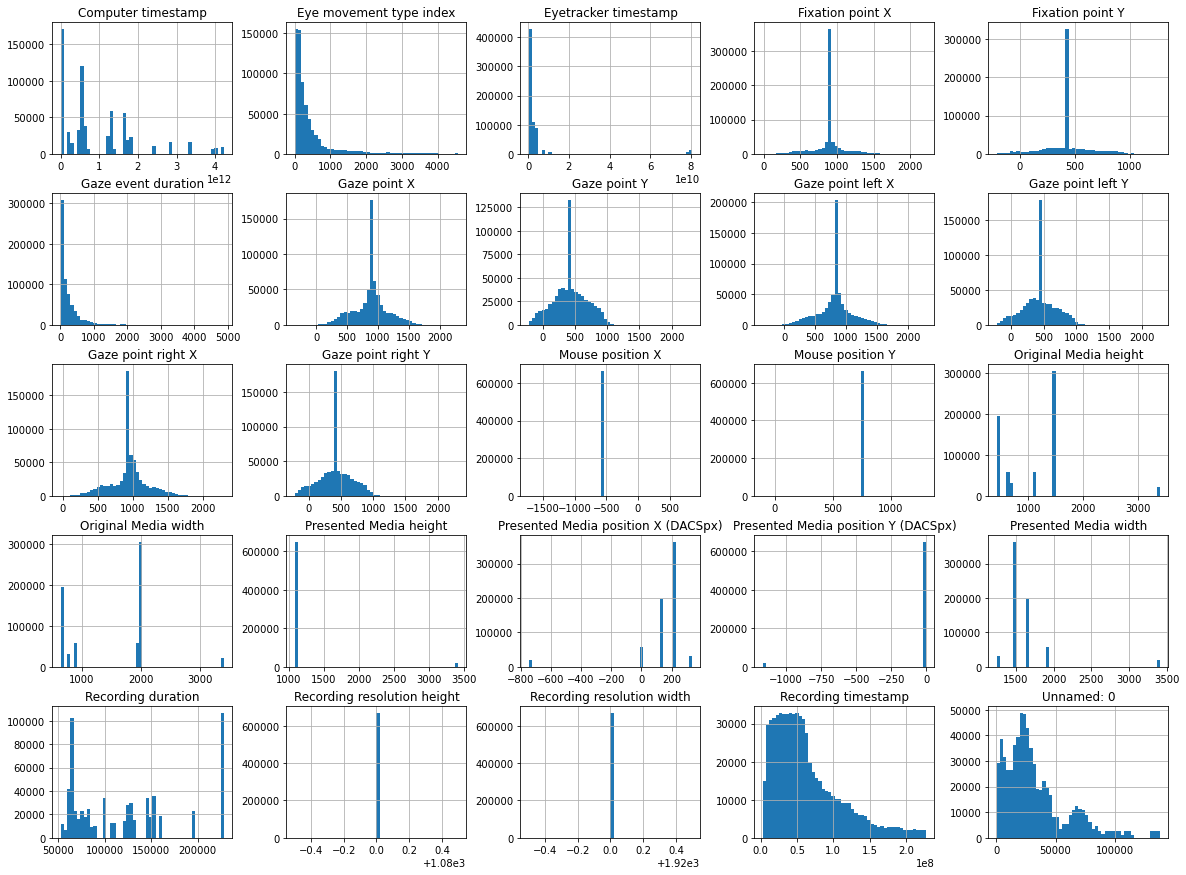

In [18]:
#Display the numerical values in the dataframe

_ = data.hist(bins=50, figsize=(20,15))

We have some insights from here already which will help us decide how to move forward. 
Before we go any further, we should create our separate train and test splits.

Exploration of the Label

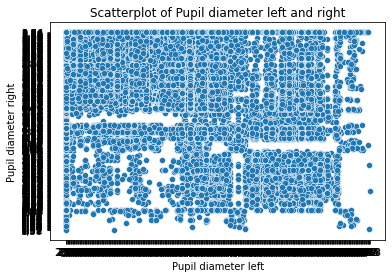

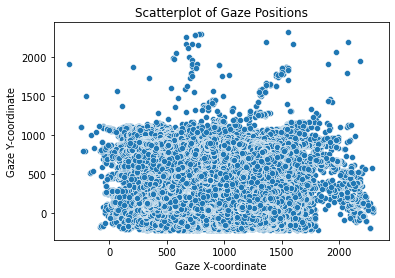

In [19]:
# Create a scatterplot of gaze positions
sns.scatterplot(data=data, x='Pupil diameter left', y='Pupil diameter right')
plt.title('Scatterplot of Pupil diameter left and right')
plt.xlabel('Pupil diameter left')
plt.ylabel('Pupil diameter right')
plt.show()

# Create a scatterplot of gaze positions
sns.scatterplot(data=data, x='Gaze point X', y='Gaze point Y')
plt.title('Scatterplot of Gaze Positions')
plt.xlabel('Gaze X-coordinate')
plt.ylabel('Gaze Y-coordinate')
plt.show()



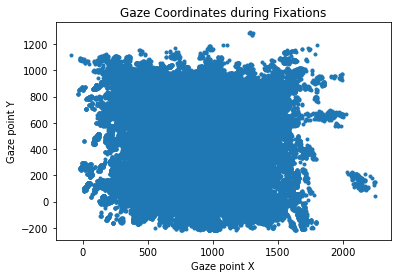

In [20]:
# Filter the data for fixations only
fixations_data = data[data['Eye movement type'] == 'Fixation']

# Plot the gaze x and y coordinates during fixations
plt.plot(fixations_data['Gaze point X'], fixations_data['Gaze point Y'], '.')
plt.title('Gaze Coordinates during Fixations')
plt.xlabel('Gaze point X')
plt.ylabel('Gaze point Y')
plt.show()

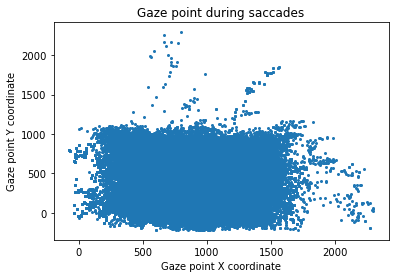

In [21]:
# Extract the saccades data
saccades = data[data['Eye movement type'] == 'Saccade']

# Plot the gaze point X and Y coordinates during saccades
plt.plot(saccades['Gaze point X'], saccades['Gaze point Y'], 'o', markersize=2)

# Add title and axis labels
plt.title('Gaze point during saccades')
plt.xlabel('Gaze point X coordinate')
plt.ylabel('Gaze point Y coordinate')

# Show the plot
plt.show()

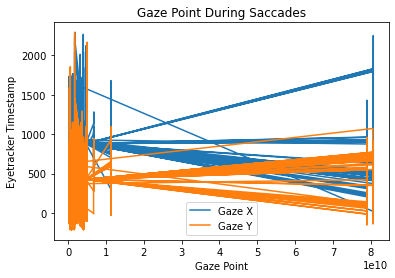

In [22]:
import matplotlib.pyplot as plt

# Extract saccade data
saccade_data = data[data['Eye movement type'] == 'Saccade']
saccade_gaze_x = saccade_data['Gaze point X']
saccade_gaze_y = saccade_data['Gaze point Y']
saccade_timestamp = saccade_data['Eyetracker timestamp']

# Plot gaze point during saccades
fig, ax = plt.subplots()
ax.plot(saccade_timestamp, saccade_gaze_x, label='Gaze X')
ax.plot(saccade_timestamp, saccade_gaze_y, label='Gaze Y')
ax.set_title('Gaze Point During Saccades')
ax.set_xlabel('Gaze Point')
ax.set_ylabel('Eyetracker Timestamp')
ax.legend()
plt.show()


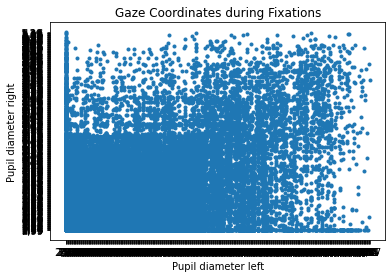

In [32]:
# Filter the data for fixations only
fixations_data = data[data['Eye movement type'] == 'Fixation']

# Plot the gaze x and y coordinates during fixations
plt.plot(fixations_data['Pupil diameter left'], fixations_data['Pupil diameter right'], '.')
plt.title('Gaze Coordinates during Fixations')
plt.xlabel('Pupil diameter left')
plt.ylabel('Pupil diameter right')
plt.show()

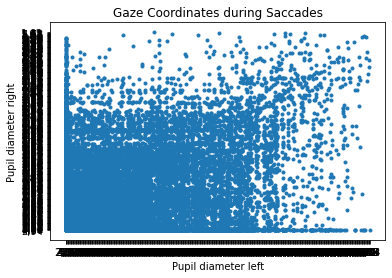

In [34]:
saccade_data = data[data['Eye movement type'] == 'Saccade']

# Plot the gaze x and y coordinates during fixations
plt.plot(saccade_data['Pupil diameter left'], saccade_data['Pupil diameter right'], '.')
plt.title('Gaze Coordinates during Saccades')
plt.xlabel('Pupil diameter left')
plt.ylabel('Pupil diameter right')
plt.show()

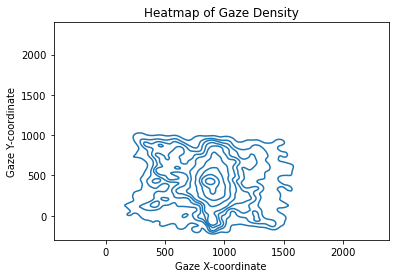

In [23]:
#Create a heatmap of gaze density
sns.kdeplot(data=data, x='Gaze point X', y='Gaze point Y')
plt.title('Heatmap of Gaze Density')
plt.xlabel('Gaze X-coordinate')
plt.ylabel('Gaze Y-coordinate')
plt.show()

Performing Feature selection

In [24]:
# Selecting the features
features = [ 'Gaze point X', 'Gaze point Y', 'Gaze point left X', 'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y', 'Gaze direction left X','Gaze direction left Y', 'Gaze direction left Z', 'Gaze direction right X','Gaze direction right Y', 'Gaze direction right Z','Pupil diameter left','Pupil diameter right','Eye position left X (DACSmm)','Eye position left Y (DACSmm)','Eye position left Z (DACSmm)','Eye position right X (DACSmm)','Eye position right Y (DACSmm)','Eye position right Z (DACSmm)','Gaze point left X (DACSmm)','Gaze point left Y (DACSmm)','Gaze point right X (DACSmm)','Gaze point right Y (DACSmm)','Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)', 'Gaze point left X (MCSnorm)', 'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)', 'Fixation point X', 'Fixation point Y','Fixation point X (MCSnorm)', 'Fixation point Y (MCSnorm)']
data[features].head()

Gaze point X  Gaze point Y  Gaze point left X  Gaze point left Y  \
0    881.035089    426.009732         818.098653         437.354278   
1    881.035089    426.009732         818.098653         437.354278   
2    194.000000     34.000000          89.000000         -22.000000   
3    259.000000     20.000000         163.000000         -48.000000   
4    372.000000     42.000000         267.000000         -15.000000   

   Gaze point right X  Gaze point right Y Gaze direction left X  \
0          944.083739          416.847747               0,00362   
1          944.083739          416.847747               0,00362   
2          299.000000           91.000000              -0,28585   
3          355.000000           89.000000              -0,25641   
4          476.000000           99.000000              -0,21295   

  Gaze direction left Y Gaze direction left Z Gaze direction right X  ...  \
0               0,01229              -0,99960               -0,05012  ...   
1               0,01229              -0,99960               -0,05012  ...   
2              -0,07154              -0,95560               -0,31181  ...   
3              -0,08331              -0,96297               -0,28856  ...   
4              -0,06955              -0,97458               -0,23662  ...   

  Gaze point X (MCSnorm) Gaze point Y (MCSnorm) Gaze point left X (MCSnorm)  \
0                 0,4479                 0,4004                      0,4077   
1                 0,4479                 0,4004                      0,4077   
2                 0,0390                 0,0319                      0,4077   
3                 0,0780                 0,0190                      0,4077   
4                 0,1460                 0,0388                      0,4077   

  Gaze point left Y (MCSnorm) Gaze point right X (MCSnorm)  \
0                      0,3716                       0,5145   
1                      0,3716                       0,5145   
2                      0,3716                       0,1020   
3                      0,3716                       0,1358   
4                      0,3716                       0,2089   

  Gaze point right Y (MCSnorm) Fixation point X Fixation point Y  \
0                       0,4466       888.039631       425.506036   
1                       0,4466       888.039631       425.506036   
2                       0,0847       888.039631       425.506036   
3                       0,0826       888.039631       425.506036   
4                       0,0918       888.039631       425.506036   

  Fixation point X (MCSnorm) Fixation point Y (MCSnorm)  
0                     0,4500                     0,0925  
1                     0,4500                     0,0925  
2                     0,4500                     0,0925  
3                     0,4500                     0,0925  
4                     0,4500                     0,0925  

[5 rows x 34 columns]

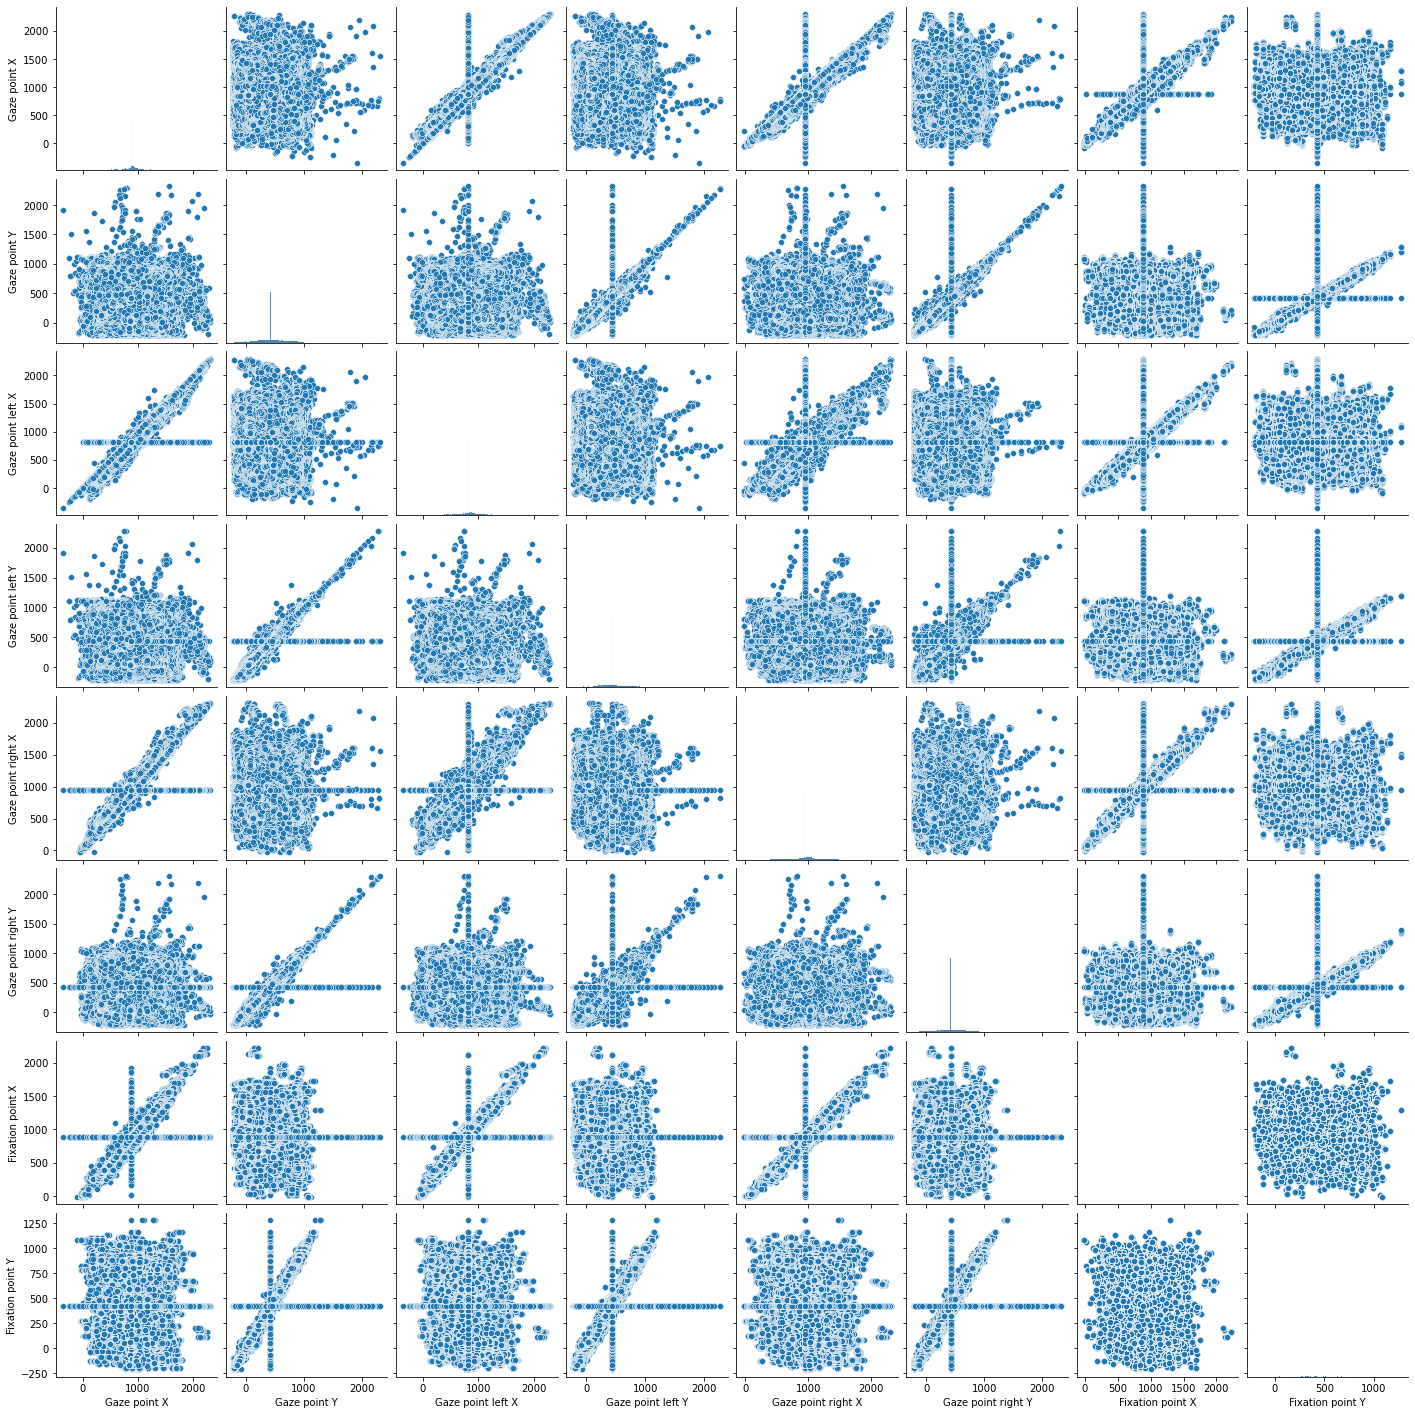

In [25]:
# Scatterplots
_ = sns.pairplot(data[features])
# An equivalent plot can be done with pandas:
#_ = pd.plotting.scatter_matrix(df[features], figsize=(12, 8))

In [26]:
# Correlations
correlations = data.corr()  # this is a dataframe
# let's see how much each attribute correlates with the outcome 'Eye movement type'
correlations['Gaze event duration'].sort_values(ascending=False)

Gaze event duration                    1.000000
Computer timestamp                     0.092198
Presented Media position X (DACSpx)    0.051199
Presented Media position Y (DACSpx)    0.043453
Gaze point right X                     0.017378
Mouse position Y                       0.012827
Gaze point X                           0.006466
Mouse position X                       0.005101
Gaze point left X                     -0.001659
Fixation point X                      -0.007012
Eyetracker timestamp                  -0.025663
Gaze point right Y                    -0.027854
Gaze point Y                          -0.036633
Presented Media height                -0.043453
Fixation point Y                      -0.046980
Gaze point left Y                     -0.050914
Presented Media width                 -0.051271
Original Media height                 -0.059497
Original Media width                  -0.068136
Unnamed: 0                            -0.070180
Recording timestamp                   -0

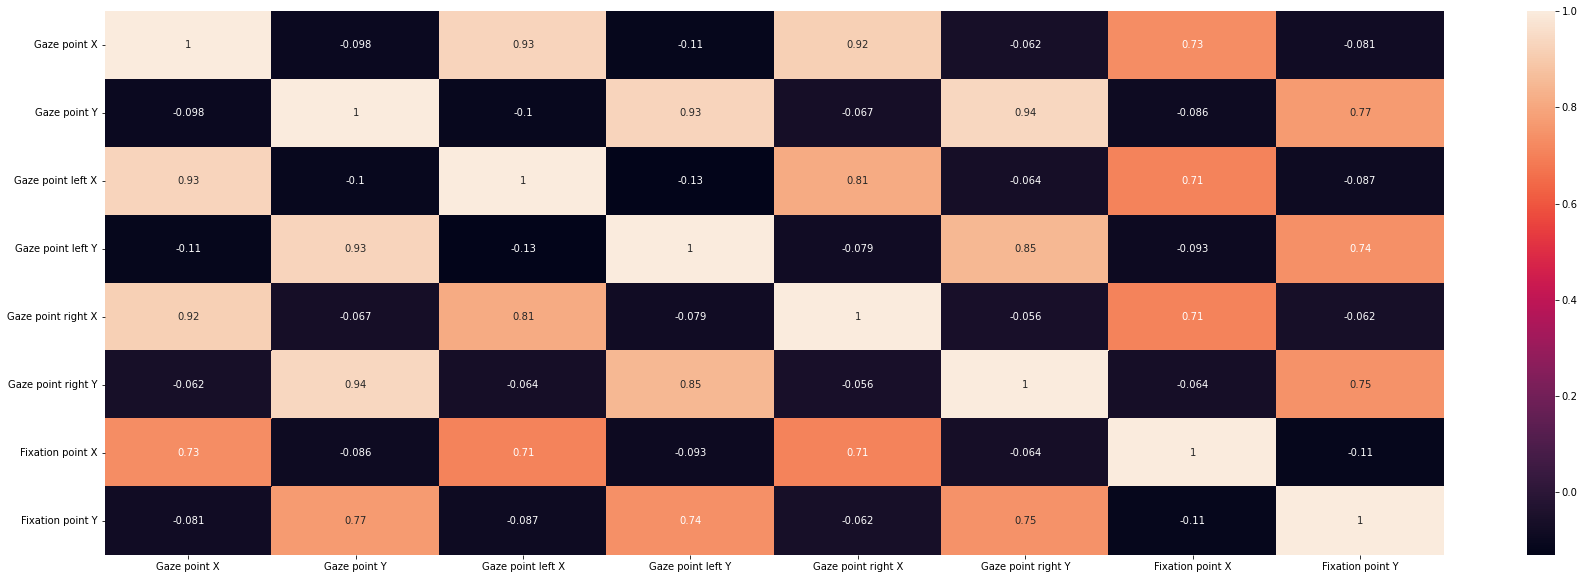

In [27]:
# Looking out for the correlation
plt.figure(figsize=(30,10))
sns.heatmap(data[features].corr(),annot=True)

Prepare data for ML algorithms
we create our separate train and test splits.

In [28]:
# Created separate training and test sets. we'll use the training set
train_set, test_set = train_test_split(data, test_size=0.2, random_state=23)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets
print(len(train_set), len(test_set))

537206 134302


In [29]:
# Let's make a copy of the training set
data = train_set.copy()

In [41]:
print("Number of rows before dropping NaNs: %d" % len(data))
data = data.dropna()
print("Number of rows after dropping NaNs: %d" % len(data))
# Separate features from outcomes
y_data = data['Eye movement type'].copy()
X_data = data[features].copy()

Number of rows before dropping NaNs: 537206
Number of rows after dropping NaNs: 537206


In [31]:
# We previously observed that some of the features were categorical. 
# Two main ways to deal with these: OrdinalEncoder() or OneHotEncoding()

# Let's use OneHotEncoding for the categories
# As we will later want to transform the test set, let's follow good practice and create a custom transformer for a sklearn pipeline

# This is an example of how it would be done. Since this is a very simple transformation, there's a better way of doing it
# using ColumnTransformer. We show it below

class OneHotEncoderCategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, cat_feats):
        self.cat_feats = cat_feats
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.get_dummies(X, columns=self.cat_feats)



In [39]:
cat_features = ['Gaze point X', 'Gaze point Y']

encoder = OneHotEncoderCategoricalFeatures(cat_features)
X_oho = encoder.transform(X_data)
X_oho

Gaze point left X  Gaze point left Y  Gaze point right X  \
398108         485.000000         -66.000000          576.000000   
494873        1678.000000         758.000000          944.083739   
272386         818.098653         437.354278          944.083739   
441694         810.000000         562.000000          944.083739   
531638        1264.000000         851.000000         1402.000000   
...                   ...                ...                 ...   
631449         818.098653         437.354278          944.083739   
82267          772.000000         120.000000          796.000000   
421324        1078.000000         246.000000         1196.000000   
338870         818.098653         437.354278          944.083739   
652006        1409.000000         -16.000000          944.083739   

        Gaze point right Y Gaze direction left X Gaze direction left Y  \
398108          -91.000000              -0,04778              -0,17919   
494873          416.847747               0,25009               0,36386   
272386          416.847747               0,00362               0,01229   
441694          416.847747              -0,03904               0,24848   
531638          805.000000               0,20814               0,22686   
...                    ...                   ...                   ...   
631449          416.847747               0,00362               0,01229   
82267           173.000000              -0,05727               0,14814   
421324          214.000000               0,14167              -0,02129   
338870          416.847747               0,00362               0,01229   
652006          416.847747               0,28586              -0,23048   

       Gaze direction left Z Gaze direction right X Gaze direction right Y  \
398108              -0,98265               -0,09761               -0,17414   
494873              -0,89725               -0,05012                0,07343   
272386              -0,99960               -0,05012                0,07343   
441694              -0,96785               -0,05012                0,07343   
531638              -0,95143                0,17051                0,20651   
...                      ...                    ...                    ...   
631449              -0,99960               -0,05012                0,07343   
82267               -0,98731               -0,15930                0,17441   
421324              -0,98969                0,07538               -0,04524   
338870              -0,99960               -0,05012                0,07343   
652006              -0,93014               -0,05012                0,07343   

       Gaze direction right Z  ... Gaze point Y_2167.0 Gaze point Y_2169.0  \
398108               -0,97987  ...                   0                   0   
494873               -0,99878  ...                   0                   0   
272386               -0,99878  ...                   0                   0   
441694               -0,99878  ...                   0                   0   
531638               -0,96347  ...                   0                   0   
...                       ...  ...                 ...                 ...   
631449               -0,99878  ...                   0                   0   
82267                -0,97170  ...                   0                   0   
421324               -0,99613  ...                   0                   0   
338870               -0,99878  ...                   0                   0   
652006               -0,99878  ...                   0                   0   

       Gaze point Y_2171.0 Gaze point Y_2186.0 Gaze point Y_2195.0  \
398108                   0                   0                   0   
494873                   0                   0                   0   
272386                   0                   0                   0   
441694                   0                   0                   0   
531638                   0                   0                   0   
...     

Regression

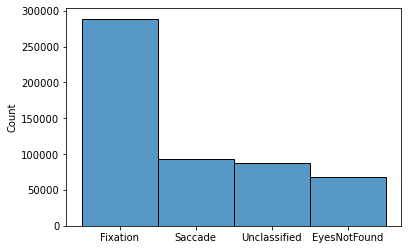

In [35]:
y = y_data.values
_ = sns.histplot(y, kde=False)

In [40]:
# Since the 'y' is skewed and the range is very large, we can also transform it
y_transformer = StandardScaler()  # we'll need this scaler for the test set later!
y = y_transformer.fit_transform(y.reshape(-1,1))
_ = sns.histplot(y, kde=False)

ValueError: could not convert string to float: 'Fixation'

In [42]:
clf = DecisionTreeRegressor()  # Decision tree
clf.fit(X_data, y)
print("MSE of the model = %1.4g" % mse(y, clf.predict(X_processed)))

ValueError: could not convert string to float: '-0,04778'

In [37]:
pip install tensorflow

     |████████████████████████████████| 230.1 MB 63 kB/s  eta 0:00:013   |████                            | 29.5 MB 812 kB/s eta 0:04:07     |█████▏                          | 37.4 MB 21.7 MB/s eta 0:00:09��███████▏        | 166.9 MB 1.8 MB/s eta 0:00:37
     |████████████████████████████████| 126 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 614 kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 57 kB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 172 kB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 5.2 MB/s eta 0:00:011
     |████████████████████████████████| 1.7 MB 8.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 440 kB 8.4 MB/s eta 0:00:01
     |██

In [38]:

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping



# Prepare the data for LSTM modeling
# Extract relevant features
features = [ 'Gaze point X', 'Gaze point Y', 'Gaze point left X', 'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y', 'Gaze direction left X','Gaze direction left Y', 'Gaze direction left Z', 'Gaze direction right X','Gaze direction right Y', 'Gaze direction right Z','Pupil diameter left','Pupil diameter right','Eye position left X (DACSmm)','Eye position left Y (DACSmm)','Eye position left Z (DACSmm)','Eye position right X (DACSmm)','Eye position right Y (DACSmm)','Eye position right Z (DACSmm)','Gaze point left X (DACSmm)','Gaze point left Y (DACSmm)','Gaze point right X (DACSmm)','Gaze point right Y (DACSmm)','Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)', 'Gaze point left X (MCSnorm)', 'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)', 'Fixation point X', 'Fixation point Y','Fixation point X (MCSnorm)', 'Fixation point Y (MCSnorm)']
X = data[features].values

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data['Eye movement type'].values, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop])

# Evaluate the LSTM model
mse = model.evaluate(X_test, y_test)

# Make predictions using the LSTM model
y_pred = model.predict(X_test)

# Visualize the actual vs predicted values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted Values')
plt.show()


ModuleNotFoundError: No module named 'tensorflow'